# 인공지능
### 한국공학대학교 메카트로닉스공학과 2019130044 손영채

###   UniversalBank Data

사용 알고리즘: Decision Tree Classifier/ Gradient Boosting Classifier/ Random Forest Classifier

- Classification: Y 데이터인 'Personal Loan'은 0과 1로 이루어져 있는 DATA기에 분류 문제로 접근하였다.
- F1_Score: 앙상블 모델인 Gradient Boosting이나 Random Forest가 Decision Tree 보다 높았다.
- Feature Importances: 대체적으로 Income, Education, Family가 공통적인 중요 변수였다.
- 학습 시간: Gradient Boositng > Random Forest > Decision Tree

In [1]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [2]:
df = pd.read_csv ('UniversalBank.csv')

#### > 불필요한 변수 제거

In [3]:
X=df.drop(['ID','ZIP Code','Personal Loan'],axis=1)

#### > Education dummy 처리 완료

In [4]:
df=pd.get_dummies(df,columns=['Education'])

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3'],
      dtype='object')

In [6]:
feature_names=X.columns.tolist()

In [7]:
Y=df['Personal Loan']

#### > Y 변수 시각화

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

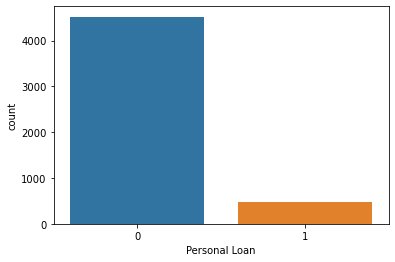

In [8]:
sns.countplot(x=Y)

#### > Train test 0.25 비율로 나눈 후 학습 및 테스트

In [9]:
# 지정한 DATA의 비율 유지를 위해 stratify=Y 작성
tr_x, ts_x, tr_y, ts_y = train_test_split(X,Y, test_size = 0.25,stratify=Y, random_state=1122)

## Decision Tree

In [10]:
dt=DecisionTreeClassifier(max_depth=9,random_state=1122)

In [11]:
start = time.time()

In [12]:
dt.fit(tr_x,tr_y)

DecisionTreeClassifier(max_depth=9, random_state=1122)

In [13]:
DT_time=time.time() - start

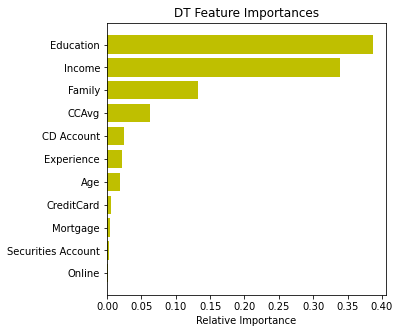

In [14]:
features = feature_names
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('DT Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [15]:
y_test_pred=dt.predict(ts_x)

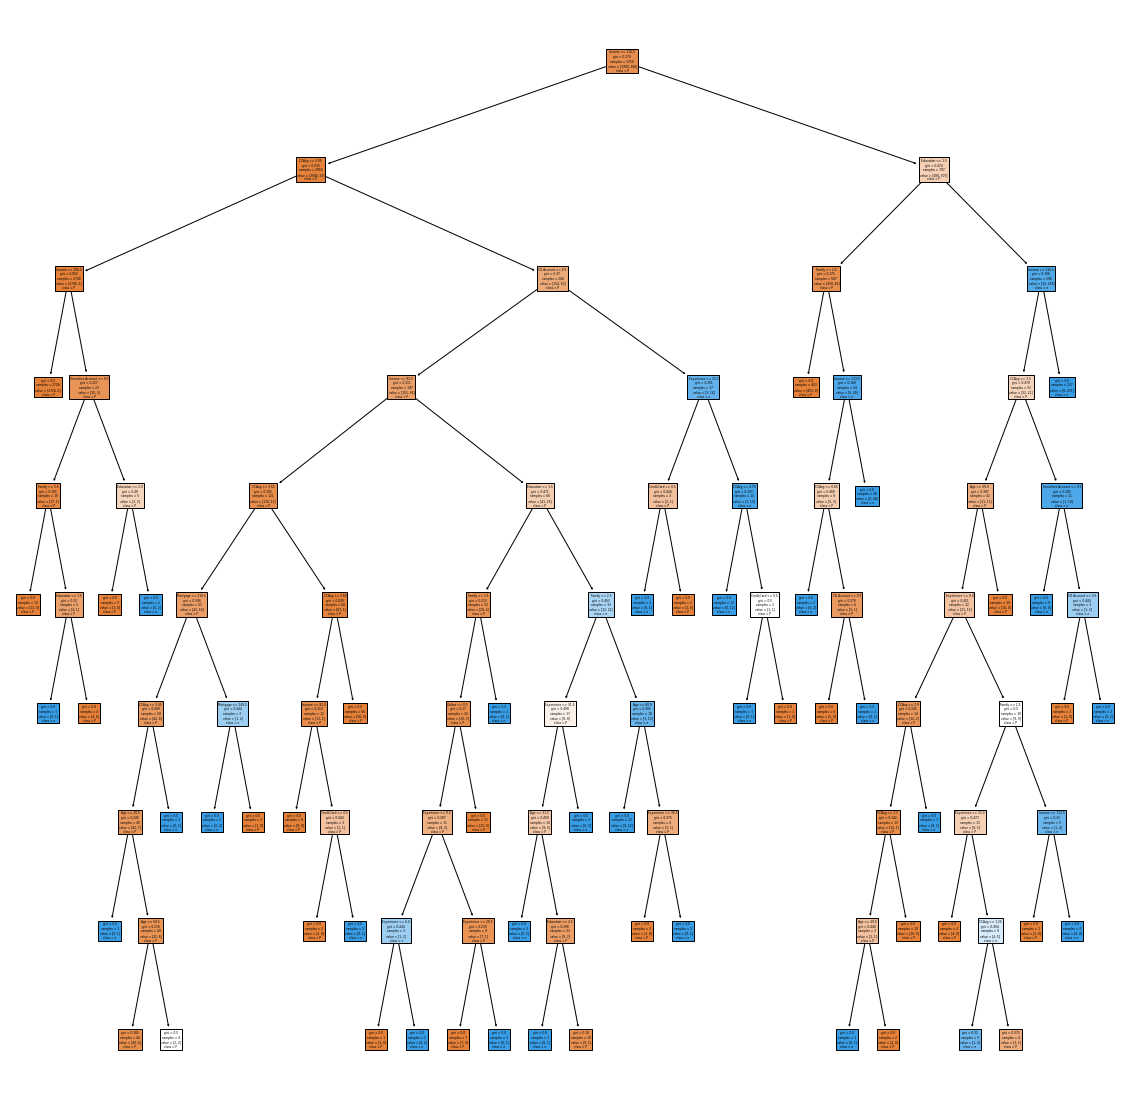

In [16]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names,  
                   class_names='Personal Loan',
                   filled=True)
fig.savefig('tree.png')

In [17]:
text_representation = tree.export_text(dt,feature_names =  list(feature_names))
print(text_representation)

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Securities Account <= 0.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Securities Account >  0.50
|   |   |   |   |--- Education <= 2.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Education >  2.00
|   |   |   |   |   |--- class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Mortgage <= 210.50
|   |   |   |   |   |   |--- CCAvg <= 3.45
|   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |  

## Gradient Boosting Classifier

In [18]:
gb=GradientBoostingClassifier(max_depth=9,random_state=1122)

In [19]:
start = time.time()

In [20]:
gb.fit(tr_x,tr_y)

GradientBoostingClassifier(max_depth=9, random_state=1122)

In [21]:
GBC_time=time.time() - start

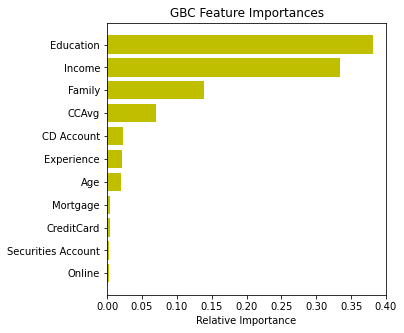

In [22]:
features = feature_names
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('GBC Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
Gpred_y=gb.predict(ts_x)

## Random Forest

In [24]:
rf = RandomForestClassifier(max_depth=9,random_state=1122)

In [25]:
start = time.time()

In [26]:
rf.fit(tr_x, tr_y)

RandomForestClassifier(max_depth=9, random_state=1122)

In [27]:
RF_time=time.time() - start

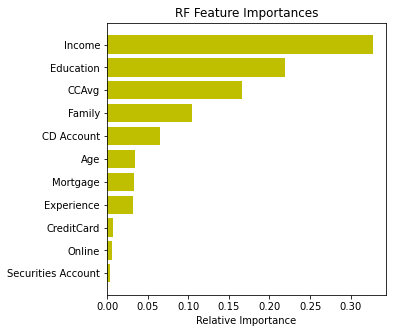

In [28]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('RF Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
Rpred_y=rf.predict(ts_x)

#### > Hyper-Parameter 구하기 (GridSearchCV 사용)

In [30]:
dt_parameters ={'max_depth' : [5,7,9,11] }

gb_parameters ={'max_depth' : [5,7,9,11] , 'n_estimators': [100], 'learning_rate':[0.05,0.1]}
# n_estimators: weak learner의 개수

rf_parameters ={'max_depth' : [5,7,9,11] , 'n_estimators': [5,10,15,20]}
# n_estimators: 결정 트리의 개수

In [31]:
# scoring 기준: f1_score
# cross-validation 3번 수행

grid_search_dt = model_selection.GridSearchCV ( estimator = dt, param_grid = dt_parameters, scoring = 'f1', cv = 3 )
grid_search_dt.fit( tr_x, tr_y )
best_dt = grid_search_dt.best_estimator_

grid_search_gb = model_selection.GridSearchCV ( estimator = gb, param_grid = gb_parameters, scoring = 'f1', cv = 3 )
grid_search_gb.fit( tr_x, tr_y )
best_gb = grid_search_gb.best_estimator_

grid_search_rf = model_selection.GridSearchCV ( estimator = rf, param_grid = rf_parameters, scoring = 'f1', cv = 3 )
grid_search_rf.fit( tr_x, tr_y )
best_rf = grid_search_rf.best_estimator_

####  > Acc, Recall, F1 Score

## Decision Tree Classifier

In [32]:
acc = accuracy_score(y_true=ts_y, y_pred=y_test_pred)
recall = recall_score(y_true=ts_y, y_pred=y_test_pred)
f1 = f1_score(y_true=ts_y, y_pred=y_test_pred)


print('DT classification')
print('acc={:.3f},recall={:.3f},f1_score={:.3f}\n'.format(acc,recall,f1))

DT classification
acc=0.985,recall=0.917,f1_score=0.921



In [33]:
best_dt

DecisionTreeClassifier(max_depth=5, random_state=1122)

In [34]:
b_dt_pred_y=best_dt.predict(ts_x)

acc = accuracy_score(y_true=ts_y, y_pred=b_dt_pred_y)
recall = recall_score(y_true=ts_y, y_pred=b_dt_pred_y)
f1 = f1_score(y_true=ts_y, y_pred=b_dt_pred_y)

print('[Hyper-Parameter] DT classification')
print('acc={:.3f},recall={:.3f},f1_score={:.3f}'.format(acc,recall,f1))

[Hyper-Parameter] DT classification
acc=0.987,recall=0.892,f1_score=0.930


## Gradient Boosting Classifier

In [35]:
acc = accuracy_score(y_true=ts_y, y_pred=Gpred_y)
recall = recall_score(y_true=ts_y, y_pred=Gpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Gpred_y)

print('Gradient Boosting Classifier')
print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}\n'.format(acc,recall,f1))

Gradient Boosting Classifier
acc=0.989, recall=0.925, f1_score=0.941



In [36]:
best_gb

GradientBoostingClassifier(max_depth=5, random_state=1122)

In [37]:
b_gb_pred_y=best_gb.predict(ts_x)

acc = accuracy_score(y_true=ts_y, y_pred=b_gb_pred_y)
recall = recall_score(y_true=ts_y, y_pred=b_gb_pred_y)
f1 = f1_score(y_true=ts_y, y_pred=b_gb_pred_y)

print('[Hyper-Parameter] Gradient Boosting Classifier')
print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

[Hyper-Parameter] Gradient Boosting Classifier
acc=0.990, recall=0.933, f1_score=0.949


## Random Forest Classifier

In [38]:
acc = accuracy_score(y_true=ts_y, y_pred=Rpred_y)
recall = recall_score(y_true=ts_y, y_pred=Rpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Rpred_y)

print('Random Forest')
print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}\n'.format(acc,recall,f1))

Random Forest
acc=0.990, recall=0.908, f1_score=0.944



In [39]:
best_rf

RandomForestClassifier(max_depth=11, n_estimators=15, random_state=1122)

In [40]:
b_rf_pred_y=best_rf.predict(ts_x)

acc = accuracy_score(y_true=ts_y, y_pred=b_rf_pred_y)
recall = recall_score(y_true=ts_y, y_pred=b_rf_pred_y)
f1 = f1_score(y_true=ts_y, y_pred=b_rf_pred_y)
print('[Hyper-Parameter] Random Forest')
print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

[Hyper-Parameter] Random Forest
acc=0.991, recall=0.917, f1_score=0.952


## 학습 시간

In [41]:
print('Decission Tree = {:.3f}s \nGradient Boosting = {:.3f}s \nRandom Forest = {:.3f}s'.format(DT_time,GBC_time,RF_time))

Decission Tree = 0.060s 
Gradient Boosting = 2.670s 
Random Forest = 0.859s
